# Формулировка задания (задача из Гмурмана):
****
![title](Task.png)
****

Будем делать эту задачу. Начнем с подключения необходимых библиотек

In [1]:
import numpy as np # Базовая математическая библиотека
np.set_printoptions(precision=5) # Округление чисел, идущих на вывод (на точность расчетов эта команда не влияет)

import matplotlib.pyplot as plt # Библиотека для рисования
%matplotlib inline 

import scipy.stats # Библиотека со статистическими классами и функциями

Первым делом надо забить нашу выборку в переменные. Заведем для этого два одномерных массива: для $x_i$ и $n_i$:
           
$x_i$ --- это просто куски интервалов (будем считать, что это середины интервалов, и вообще будем с ними обращаться как с элементами выборки), взятые с одинаковым шагом. Всего их 11. 

In [2]:
x = np.linspace(0.3, 2.3, 11)
print(x)

[0.3 0.5 0.7 0.9 1.1 1.3 1.5 1.7 1.9 2.1 2.3]


Наблюдаемые частоты (не уверен насчет слова "частота", но вроде так допустимо говорить в значении "количество"):

In [3]:
n = np.array([6, 9, 26, 25, 30, 26, 21, 24, 20, 8, 5])

А вообще, наша выборка целиком выглядит вот так:

In [4]:
total_sample = []
for i in range(len(x)):
    total_sample += [x[i]] * n[i]
    
total_sample = np.array(total_sample)
print(total_sample)

[0.3 0.3 0.3 0.3 0.3 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.7 0.7 0.7
 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7
 0.7 0.7 0.7 0.7 0.7 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3
 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.7
 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7
 1.7 1.7 1.7 1.7 1.7 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9
 1.9 1.9 1.9 1.9 1.9 1.9 1.9 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.3 2.3 2.3
 2.3 2.3]


Можно посчитать какие-нибудь базовые статистики. Например, выборочное среднее и выборочную дисперсию, они нам дальше пригодятся. 

In [5]:
sample_mean = total_sample.mean()
print('Выборочное среднее:', sample_mean)

sample_var = total_sample.var()
print('Выборочная дисперсия:', sample_var)

sample_std = sample_var**0.5
print('Выборочное среднеквадратичное отклонение:', sample_std)

Выборочное среднее: 1.2619999999999998
Выборочная дисперсия: 0.24015599999999995
Выборочное среднеквадратичное отклонение: 0.49005713952558627


Перед тем, как приступать к решению задачи, хотелось бы дать некоторые пояснения насчет условия. 

# Понимаем условие задачи

Давайте еще раз посмотрим на выборку:

In [6]:
print(total_sample)

[0.3 0.3 0.3 0.3 0.3 0.3 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.7 0.7 0.7
 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7 0.7
 0.7 0.7 0.7 0.7 0.7 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9
 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 0.9 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1 1.1
 1.1 1.1 1.1 1.1 1.1 1.1 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3
 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.3 1.5 1.5 1.5 1.5
 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.5 1.7
 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7 1.7
 1.7 1.7 1.7 1.7 1.7 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9 1.9
 1.9 1.9 1.9 1.9 1.9 1.9 1.9 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.1 2.3 2.3 2.3
 2.3 2.3]


Представим, что эти числа к нам пришли откуда-то извне (например, с некоего датчика, измеряющего некий процесс). Хотелось бы сделать какой-то вывод на основе этих данных.      
Лучший способ начать работу: просто посмотреть на то, что у нас вообще есть. Стандартный инструмент для "смотрения" на выборку -- гистограмма. Нарисуем ее:

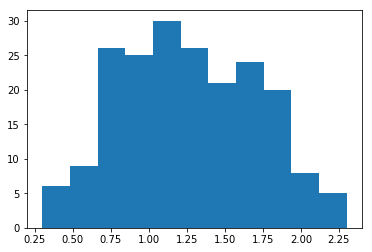

In [7]:
plt.hist(total_sample, bins=11);

Напоминает ли она вам что-нибудь? Лично я бы посмотрел в сторону бета-распределения. Однако эту творческую часть работы уже сделали за нас -- в формулировке из Гмурмана конкретно говорится про проверку гипотезы о нормальном распределении.       
       
Если у нас выборка из нормального распределения, то давайте поймем, какие у этого распределения будут параметры. Для этого предлагаю использовать метод максимального правдоподобия. На одном из прошлых семинаров мы как раз получали оценки максимального правдоподобия для нормального распределения в случае обоих неизвестных параметров. 

Получили, что ОМП-оценка параметра $\alpha$ -- выборочное среднее, а параметра $\sigma$ -- выборочная дисперсия (причем, смещенная). 

Как раз эти параметры мы и насчитали чуть выше.

## Поясняющая картинка
Есть очень хорошая рекомендация: при работе с данными рисуйте все, что только можно нарисовать. Числа зачастую дают очень искаженную картину реальности (разумеется, они не могут лгать, просто очень легко ошибиться с их интерпретацией). 

Давайте нарисуем условие задачи.


Напоминаю, что мы считаем $x_i$ центрами соответсвующих интервалов. Найдем ожидаемые частоты (сколько точек должно было попасть в каждый из интервалов в случае, если у нас действительно нормальное распределение)

In [8]:
e = scipy.stats.norm.cdf(x=np.linspace(0.2, 2.4, 12), loc=sample_mean, scale=sample_std)

probabilities = e[1:] - e[:-1]
expected_counts = probabilities * total_sample.size
print(expected_counts)

[ 4.83535  9.81582 16.90709 24.70945 30.64189 32.2426  28.78773 21.80949
 14.01974  7.64687  3.53888]


Все, теперь наконец-то можно рисовать.

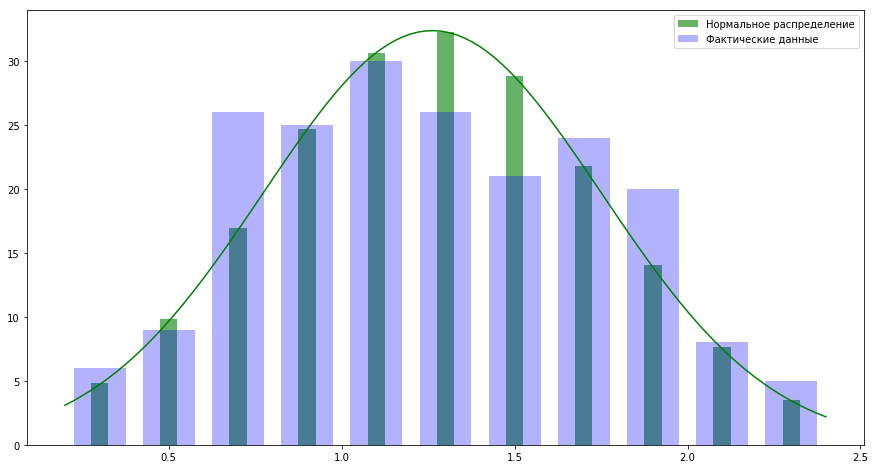

In [9]:
plt.figure(figsize=(15,8))
plt.bar(x, height=expected_counts, alpha=0.6, width=0.05, color='green', label='Нормальное распределение')
plt.bar(x, height=n, alpha=0.3, width=0.15, color='blue', label='Фактические данные')

x_cont = np.linspace(0.2, 2.4, 100)
pdf_cont = scipy.stats.norm.pdf(x=x_cont, loc=sample_mean, scale=sample_std)*39.75
plt.plot(x_cont, pdf_cont, color='green')
plt.legend();

Подытожим:
* Нам откуда-то пришли некие числа.
* Мы нарисовали гистограмму (синие столбцы) этой выборки. 
* Посмотрели на гистограмму "и сделали предположение" (так в идеале, а по факту гипотеза сформулирована в задании), что они имеют нормальное распределение. 
* Тогда нам нужно как-то оценить параметры этого распределения. Используем для этого метод максимального правдоподобия. 
* После того, как мы получили оценку параметров, мы можем нарисовать "плотность распределения" -- зеленая непрерывная линия. (параметр 39.75 я выбирал из расчета, чтобы график смотрелся красиво. Дальше это число никак не используется)
* Гораздо важнее, что теперь мы можем посчитать ожидаемое количество попаданий в каждый интервал по формуле
          (вероятность попадания в интервал) * (объем выборки)         
  (Обязательно спрошу на экзамене, что это вообще такое и откуда следует)        
  На графике ожидаемое количество попаданий нарисовано зелеными столбцами.  
* Теперь от нас требуется провести анализ того, насколько синие и зеленые столбцы близки друг к другу. И выразить это в каком-то более-менее понятном виде. 

При решении любой задачи (не обязательно математической) стоит задавать вопрос "насколько моя задача типична". Типичные задачи обычно имеют готовые решения. Вообще говоря, вопрос о том, насколько имеющаяся выборка согласуется с нормальным распределением -- настолько типичен, что существуют методы, специально заточенные на работу именно с нормальным распределением. Однако по заданию мы будем пользоваться более универсальной штукой, подходящей к любым распределениям. И называется это

# Критерий согласия Пирсона (или критерий "хи-квадрат")

Основная идея как раз таки сравнение высот столбцов. То есть, ожидаемого количества попаданий в каждый интервал и фактического. Лучше всего, как мне кажется, этот критерий описан в томе 2 "Искусства программирования" Кнута. Очень рекомендую почитать, тем более, что я не смогу эту тему рассказать лучше.       

Приведу только основную идею:
1. У нас есть фактические количества попаданий в каждый интервал: $n_i$
2. Также для каждого интервала мы знаем вероятности попадания в него при условии верности нашей гипотезы: $p_i$. Следовательно, мы знаем ожидаемое число попаданий в каждый интервал: $Np_i$, где $N$ -- объем выборки
3. Нас интересуют разности $n_i - Np_i$
4. Причем, интересует именно абсолютные значения этих разностей. Самый простой способ избавиться от знака -- возвести в квадрат (можно, конечно, взять модуль, но с этой функцией сложно работать, поэтому стандартным вариантом является именно возведение в квадрат). Получаем $(n_i - Np_i)^2$
5. Заметим, что интервалы у нас неравноправны. Если мы ожидаем, что в каком-то интервале будет 10000 точек, а пришло 10100 -- это далеко не так критично, как если бы мы ожидали всего одну точку в интервале, а получили 101. И там, и там разница (в виде числа) одинаковая, но интуитивно понятно, что второй случай необходимо учитывать намного сильнее. Отсюда следует нормировка на ожидаемое количество попаданий в интервал: $\frac{(n_i - Np_i)^2}{Np_i}$
6. Наконец, мы берем сумму по всем интервалам и получаем статистику критерия:
$$
Y = \sum_{i=1}^m\frac{(n_i - Np_i)^2}{Np_i}
$$
    где m -- количество интервалов (в нашем примере их 11)
7. Как любая статистика критерия в случае верной нулевой гипотезы (то есть, в нашем случае -- если наши числа действительно пришли из нормального распределения) $Y$ имеет известное распределение. В данном случае -- распределение хи-квадрат. Это распределение имеет один параметр (называется "число степеней свободы"), равный $(m-1)$. То есть, в нашем случае их 10. 

Нарисуем плотность этого распределения

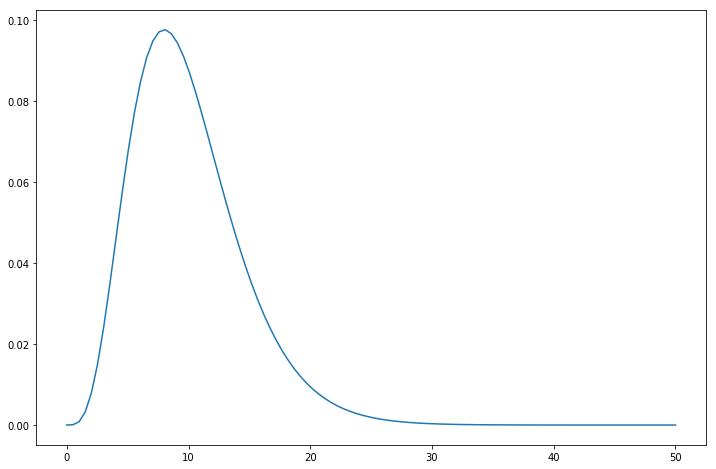

In [10]:
x_chi2 = np.linspace(0, 50, 100)
y_chi2 = scipy.stats.chi2.pdf(x_chi2, df=10)

plt.figure(figsize=(12, 8))
plt.plot(x_chi2, y_chi2)

Стандартный алгоритм проверки статистических гипотез дальше немного разветвляется. Первый способ совсем классический, основан на использовании заранее определенного уровня значимости (в формулировке задания это 0.05). Идея тут следующая: 
1. У нас есть некое значение $Y$, которое нам показывает, насколько гистограмма близка к ожидаемой. Соответственно, если $Y$ имеет большое значение, то у нас большая разница между ожиданием и реальностью. Конечно, такое может произойти и при верной нулевой гипотезе, однако вероятность этого мала. 
2. Поэтому мы будем выбирать некоторое значение $y_0$, такое, что при $Y>y_0$ мы будем отвергать нулевую гипотезу. Разумеется, может быть и так, что нам не повезет с данными и мы отвергнем верную нулевую гипотезу. Такая ошибка называется "ошибкой первого рода". 
3. Поскольку мы можем выбирать $y_0$, то мы можем таким образом управлять вероятностью совершить ошибку первого рода. Фиксируем некоторое значение этой вероятности, которое нас устраивает (тут это сделали за нас, это и есть уровень значимости, равный 0.05). 
4. Теперь, когда мы знаем уровень значимости, мы ищем $y_0$. Как нетрудно догадаться, мы его ищем таким образом, чтобы площадь под графиком плотности распределения правее $y_0$ была равна 0.05. 
5. В этом нам поможет обратная функция к функции распределения. Значения этой функции обычно называют "процентили" или "квантили" (зависит от источника, лично я предпочитаю говорить "квантиль"). Их можно посмотреть во многочисленных таблицах (например, здесь: https://ru.wikipedia.org/wiki/%D0%9A%D0%B2%D0%B0%D0%BD%D1%82%D0%B8%D0%BB%D0%B8_%D1%80%D0%B0%D1%81%D0%BF%D1%80%D0%B5%D0%B4%D0%B5%D0%BB%D0%B5%D0%BD%D0%B8%D1%8F_%D1%85%D0%B8-%D0%BA%D0%B2%D0%B0%D0%B4%D1%80%D0%B0%D1%82), либо посчитать с помощью готовых функций (разумеется, в питоне они тоже есть). Сейчас мы сделаем оба варианта. 

## С помощью таблицы
Нам нужна квантиль уровня 0.95 распределения хи-квадрат с 10 степенями свободы. Смотрим на таблицу с Википедии. По вертикали у нас степени свободы, по горизонтали -- перевернутые значения уровня квантили (то есть, те самые уровни значимости). Смотрим на 10 строку, на столбец, соответствующий значению 0.05, видим число **18.307**. Это и есть наше $y_0$

## С помощью функции из статистической библиотеки питона
Просто вызываем функцию, передавая ей желаемый уровень значимости (точнее, желаемый уровень квантили) и число степеней свободы. 

In [11]:
scipy.stats.chi2.ppf(0.95, 10)

18.307038053275146

Вообще, современным численным методам я бы доверял больше, чем статистическим таблицам, особенно, когда речь заходит про n-е знаки после запятой. Но всегда есть риск ошибиться в коде, поэтому лишняя проверка не помешает. Но сейчас все нормально, мы получили примерно то же число. 

# Финальные штрихи
Теперь мы знаем, что при попадании $Y$ в интервал $(18.307, \infty )$ мы можем отбросить нулевую гипотезу, рискуя при этом ошибиться не более чем с 5-процентной вероятностью. Нас это устраивает. Осталось посчитать $Y$ и посмотреть, попадает ли он в этот интервал. Считаем:

In [12]:
Y = ((n - expected_counts)**2 / expected_counts).sum()
print(Y)

11.961434811334154


# Альтернативный способ -- реально достигнутый уровень значимости

Существует и другой путь: вместо того, чтобы высчитывать критическую область, мы просто находим вероятность того, что наша статистика критерия примет значение более экстремальное, чем то, что есть в нашей выборке (ведь мы знаем и $Y$, и его распределение, можно просто их сопоставить).       
После того, как мы найдем реально достигнутый уровень значимости (его также называют p-value или p-значение), нам останется только его сопоставить с уровнем значимости, который мы выбрали для нашей задачи. 



Преимущество данного способа в том, что подсчет p-value намного проще программно реализовать. Что уже сделали, разумеется. Давайте же просто вызовем готовую функцию и найдем РДУЗ:

In [13]:
scipy.stats.chisquare(n, expected_counts)

Power_divergenceResult(statistic=11.961434811334154, pvalue=0.28764582076710915)

В выводе функции мы видим два числа. Первое (statictic) -- это уже знакомая нам статистика критерия $Y$, которую мы чуть выше посчитали "в лоб". Второе (pvalue) -- тот самый реально достигнутый уровень значимости. Скопирую сюда хорошее объяснение с одного из математических форумов:        

    Чтобы понять его смысл, попробуйте представить две ситуации. 
    1. Выборка у Вас такова, что этот РДУЗ равен 0.0001.
    2. Выборка у Вас такова, что этот РДУЗ равен 0.72.

    Во втором случае гипотеза будет приниматься любым критерием, размер которого - аж до 0.72. 
    Т.е. даже если Вы захотите пользоваться критерием, отвергающим правильную основную гипотезу в 71% случаев (при самом минимальном подозрении), Вы по Вашей выборке все равно ее примете. 

    В первом случае только критерии, отвергающие верную основную гипотезу реже, чем в одном случае из 10000 (почти никогда), примут ее по Вашей выборке.
    
    
В нашем случае РДУЗ равен примерно 0.28. Если мы решим поставить уровень значимости в 0.05 (условие задачи), то мы примем основную гипотезу. 

# Общий алгоритм
Те из вас, кто почитал оглавление Гмурмана, наверняка заметили большое количество задач на разнообразные статистические критерии. Вообще, они все решаются по примерно одному и тому же алгоритму:

1. Сформулировать основную (нулевую) и альтернативную гипотезы
2. Выбрать критерий (т.е. такую функцию от выборки, которая информативна и имеет известное нам распределение в случае верной нулевой гипотезы)
3. Выбрать уровень значимости
4. Определить критическую область
5. Посчитать критерий и посмотреть, попадает ли он в критическую область. Если нет -- то принять основную гипотезу. 

ИЛИ 

1. Сформулировать основную (нулевую) и альтернативную гипотезы
2. Выбрать критерий (т.е. такую функцию от выборки, которая информативна и имеет известное нам распределение в случае верной нулевой гипотезы)
3. Посчитать критерий
4. Найти РДУЗ
5. Выбрать уровень значимости, сопоставить его с РДУЗ. Если он меньше, чем РДУЗ -- принять основную гипотезу. 